In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("titanic.csv")

In [54]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Understanding the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

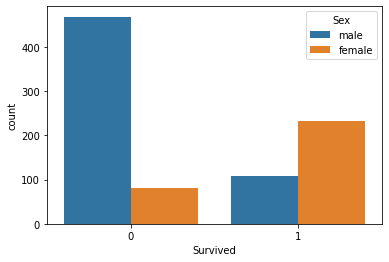

In [4]:
sns.countplot(x="Survived",hue="Sex",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

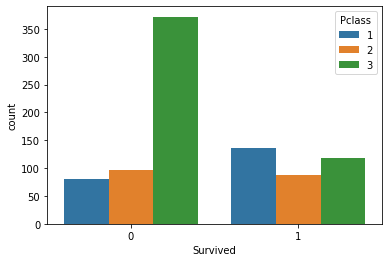

In [5]:
sns.countplot(x="Survived",hue="Pclass",data=data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Removing Null

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.drop("Cabin",axis=1,inplace=True)

In [9]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Converting Strings to Binary(Categorical)

In [12]:
pd.get_dummies(data['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [13]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head(4)

,male
0,1
1,0
2,0
3,0


In [14]:
Loc=pd.get_dummies(data["Embarked"])
Loc.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [15]:
Loc=pd.get_dummies(data["Embarked"],drop_first=True)
#if both is zero then it belongs to C

In [16]:
Loc.head(4)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1


In [17]:
#similarly for Class
Class=pd.get_dummies(data["Pclass"],drop_first=True)
Class.head(4)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0


In [18]:
data=pd.concat([data,sex,Loc,Class],axis=1)
data.drop(['Sex','Embarked','Pclass','Name','Ticket','PassengerId'],axis=1,inplace=True)
data.head(4)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0


In [19]:
X=data.drop("Survived",axis=True)
y=data['Survived']

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     712 non-null    float64
 1   SibSp   712 non-null    int64  
 2   Parch   712 non-null    int64  
 3   Fare    712 non-null    float64
 4   male    712 non-null    uint8  
 5   Q       712 non-null    uint8  
 6   S       712 non-null    uint8  
 7   2       712 non-null    uint8  
 8   3       712 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 31.3 KB


In [20]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
689,15.0,0,1,211.3375,0,0,1,0,0
279,35.0,1,1,20.2500,0,0,1,0,1
508,28.0,0,0,22.5250,1,0,1,0,1
9,14.0,1,0,30.0708,0,0,0,1,0
496,54.0,1,0,78.2667,0,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

c:\users\pratik\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\pratik\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\pratik\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model=LogisticRegression()

In [42]:
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
prediction=model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
perc=accuracy_score(y_test,prediction)*100

In [51]:
print("Accuracy Percentage=",perc,"%")

Accuracy Percentage= 77.57009345794393 %


In [56]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,prediction),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,102,24
Actual Yes,24,64
